In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

import pickle

from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [18]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis

melihat perbedaan dari distribusi data churn dan tidak churn

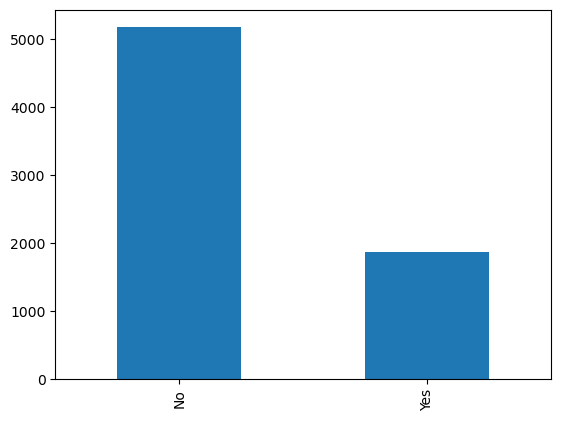

In [20]:
df.Churn.value_counts().plot(kind='bar')
plt.show()

## Variabel Numerik

melihat variabel prediktor yang bersifat numeric 

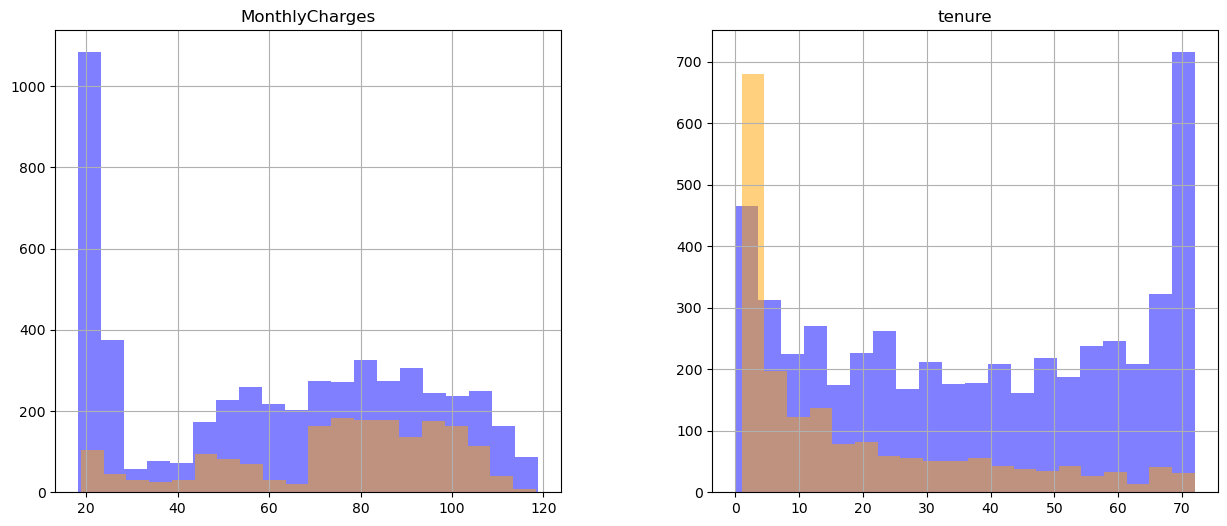

In [21]:
# create bin in chart
numerical_feature = ['MonthlyCharges','TotalCharges','tenure']

fig, ax = plt.subplots(1,2, figsize=(15,6))
df[df['Churn'] == 'No'][numerical_feature].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df['Churn'] == 'Yes'][numerical_feature].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

## variable kategori

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


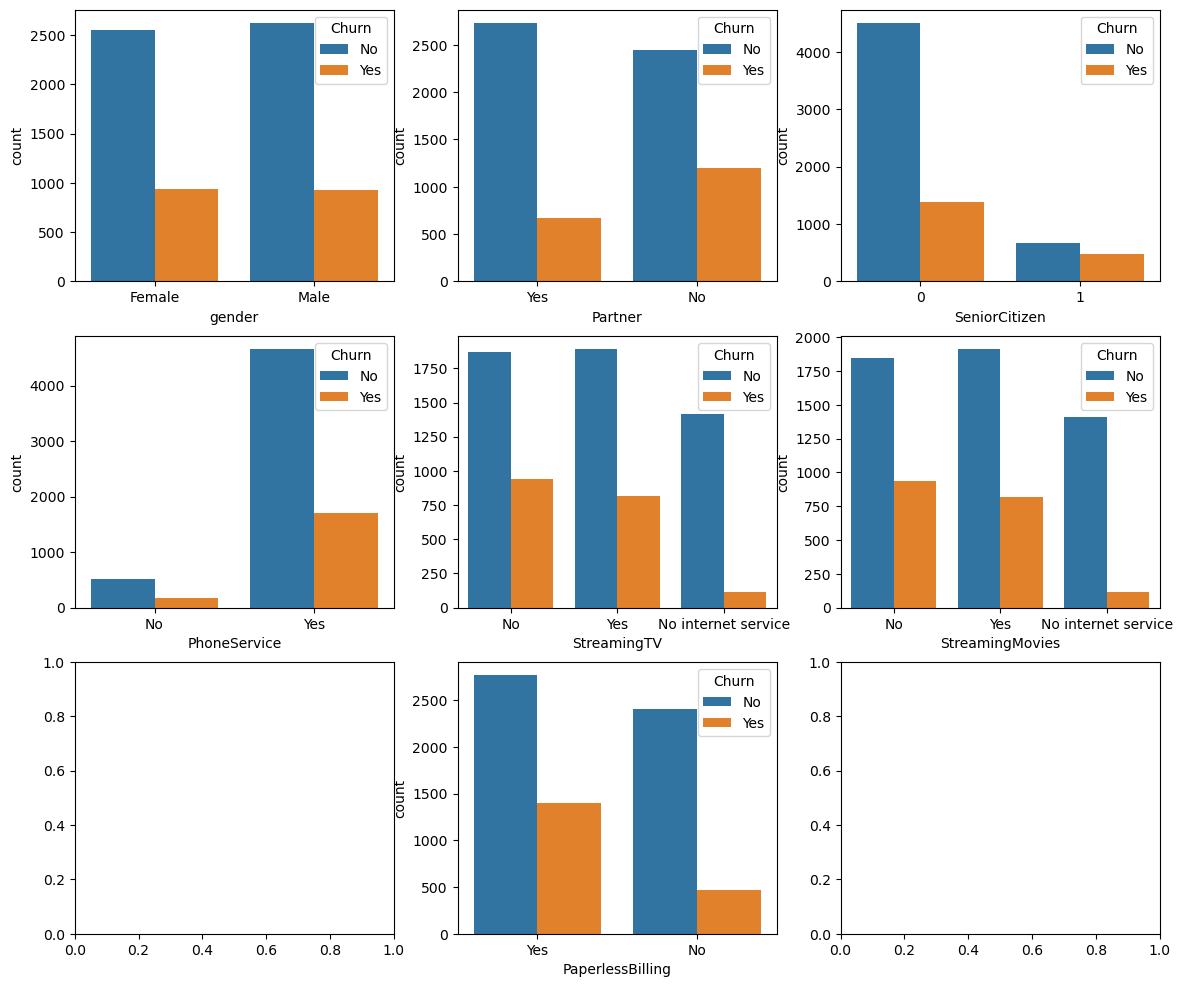

In [23]:
kategori_feature = ['gender','Partner', 'SeniorCitizen', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

fig, ax = plt.subplots(3,3, figsize=(14,12))

sns.countplot(data=df, x=kategori_feature[0], hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x=kategori_feature[1], hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x=kategori_feature[2], hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x=kategori_feature[3], hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x=kategori_feature[4], hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x=kategori_feature[5], hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x=kategori_feature[6], hue='Churn', ax=ax[2][1])

plt.show()

Berdasarkan hasil dan analisa di atas dapat disimpulkan:

pada tahap C.1 dapat kita ketahui bawa sebaran data secara keseluruhan customer tidak melakukan churn, dengan detil churn sebanyak 26% dan No Churn sebanyak 74%

pada tahap C.2 dapat kita ketahui bahwa 
- untuk 'MonthlyCharges' ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan churn. 
- untuk 'TotalCharges' terlihat tidak ada kecenderungan terhadap Churn customer. 
- untuk 'tenure' ada kecenderungan semakin lama customer berlangganan, semakin kecil kecenderungan untuk melakukan churn

pada tahap C.3 dapat kita ketahui bahwa tidak ada perbedaan yang siginfikan untuk orang melakukan churn dilihat dari faktor jenis kelamin(gender) dan layanan telfon(PhoneService). akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner), orang-orang yang statusnya adalah senior citizen(SeniorCitizen), orang-orang yang memiliki layanan streaming TV(StreamingTv), orang-orang yang mempunyai layanan internet(InternetService), orang-orang yang tagihannya paperless

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# transform data

In [25]:
clean_df = df.drop(['customerID'], axis=1)

In [26]:
for column in clean_df.columns:
    if clean_df[column].dtype == np.number: continue
    # performing for each non-numeric column
    clean_df[column] = LabelEncoder().fit_transform(clean_df[column])
clean_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [28]:
X = clean_df.drop(['Churn'], axis=1)
y = clean_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('jumlah baris dan kolom X_train:', X_train.shape)
print('jumlah baris dan kolom y_train:', y_train.shape)
print('persentase Churn di data Training:')
print(y_train.value_counts(normalize=True))

print('jumlah baris dan kolom X_test:', X_test.shape)
print('jumlah baris dan kolom y_test:', y_test.shape)
print('persentase Churn di data Testing:')
print(y_test.value_counts(normalize=True))

jumlah baris dan kolom X_train: (4930, 19)
jumlah baris dan kolom y_train: (4930,)
persentase Churn di data Training:
0    0.737323
1    0.262677
Name: Churn, dtype: float64
jumlah baris dan kolom X_test: (2113, 19)
jumlah baris dan kolom y_test: (2113,)
persentase Churn di data Testing:
0    0.728348
1    0.271652
Name: Churn, dtype: float64


# model building

In [29]:
log_model = LogisticRegression().fit(X_train,y_train)
print('model logistic regression yang terbentuk adalah : ', log_model)

model logistic regression yang terbentuk adalah :  LogisticRegression()


In [33]:
y_pred = log_model.predict(X_train)
print('classification report training model(logistic regression):')
print(classification_report(y_train, y_pred))

classification report training model(logistic regression):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3635
           1       0.65      0.52      0.58      1295

    accuracy                           0.80      4930
   macro avg       0.75      0.71      0.72      4930
weighted avg       0.79      0.80      0.79      4930



In [35]:
print(confusion_matrix(y_train,y_pred))

[[3273  362]
 [ 620  675]]


In [37]:
print('classification report test model (logistic regression) :')
print(classification_report(y_test, log_model.predict(X_test)))

classification report test model (logistic regression) :
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.53      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [39]:
print(confusion_matrix(y_test, log_model.predict(X_test)))

[[1395  144]
 [ 268  306]]
